In [1]:
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_md")

/Users/lukas/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from docx import Document

In [4]:
document = Document('./../Bachelor_Thesis_stefan.docx')

In [18]:
paragraphs = document.paragraphs
text = ''

for i, p in enumerate(paragraphs):
    if len(p.text) > 100:
        text += p.text

In [19]:
doc = nlp(text)

18995

In [17]:
for ent in doc.ents: 
    print(ent.text, ent.label_)

Linde plc ORG
Linde ORG
Enterprise Architecture ORG
EA ORG
The Open Group Architecture Framework ORG
TOGAF ORG
BC PRODUCT
Germany GPE
Korea GPE
BC ORG
Linde ORG
Linde ORG
this Bachelor Thesis WORK_OF_ART
Chapter 2 LAW
chapter 3 LAW
TOGAF ORG
BC Management ORG
chapter 4 LAW
Digital Collection ORG
Google Scholar ORG
SpringerLink ORG
second ORDINAL
Linde plc ORG
Chapter 5 LAW
BC ORG
BC GPE
BC PRODUCT
four CARDINAL
TOGAF ORG
Korea GPE
Germany GPE
two CARDINAL
Linde ORG
BC ORG
Linde ORG
BC ORG
Germany GPE
the German Corporate Governance Code ORG
the Federal Ministry of Justice ORG
the early two-thousands DATE
German NORP
European NORP
the European Corporate Governance Forum ORG
the Organisation for Economic Co-Operation and Development ORG
OECD ORG
Mayer PERSON
three CARDINAL
two CARDINAL
Control Objectives for Information and Related Technology ORG
Information Technology Infrastructure Library ORG
CObIT NORP
Gartner ORG
two CARDINAL
daily DATE
EA ORG
EA ORG
two CARDINAL
EA ORG
the 1980s DA

In [8]:
named_ents_dic = {}
for ent in doc.ents:
    if ent.label_ in named_ents_dic:
        named_ents_dic[ent.label_] += 1
    else:
        named_ents_dic[ent.label_] = 1

In [9]:
sorted_ents_dic = {k: v for k, v in sorted(named_ents_dic.items(), key=lambda item: item[1], reverse=True)}
print(sorted_ents_dic)

{'ORG': 416, 'CARDINAL': 130, 'GPE': 73, 'PRODUCT': 43, 'LAW': 31, 'ORDINAL': 26, 'DATE': 26, 'PERSON': 25, 'LOC': 13, 'MONEY': 11, 'NORP': 9, 'PERCENT': 8, 'WORK_OF_ART': 7, 'EVENT': 5, 'FAC': 1, 'TIME': 1}


In [10]:
from spacy import displacy
displacy.render(doc, style='ent')

In [11]:
import pandas as pd

data = {'Named Entities': list(sorted_ents_dic.keys()),
        'Found in Document' : list(sorted_ents_dic.values())
        }

df = pd.DataFrame(data=data)

In [12]:
print(df.head())

  Named Entities  Found in Document
0            ORG                416
1       CARDINAL                130
2            GPE                 73
3        PRODUCT                 43
4            LAW                 31


In [13]:
total_entities = df['Found in Document'].sum()
percentage = [x / total_entities for x in df['Found in Document'].tolist()]
df['Percentage'] = percentage

In [14]:
data = [ent + ': ' + spacy.explain(ent) for ent in df['Named Entities'].tolist()]
df.insert(1, 'Definition', data)

In [15]:
df.to_excel('Named_Entities.xlsx')

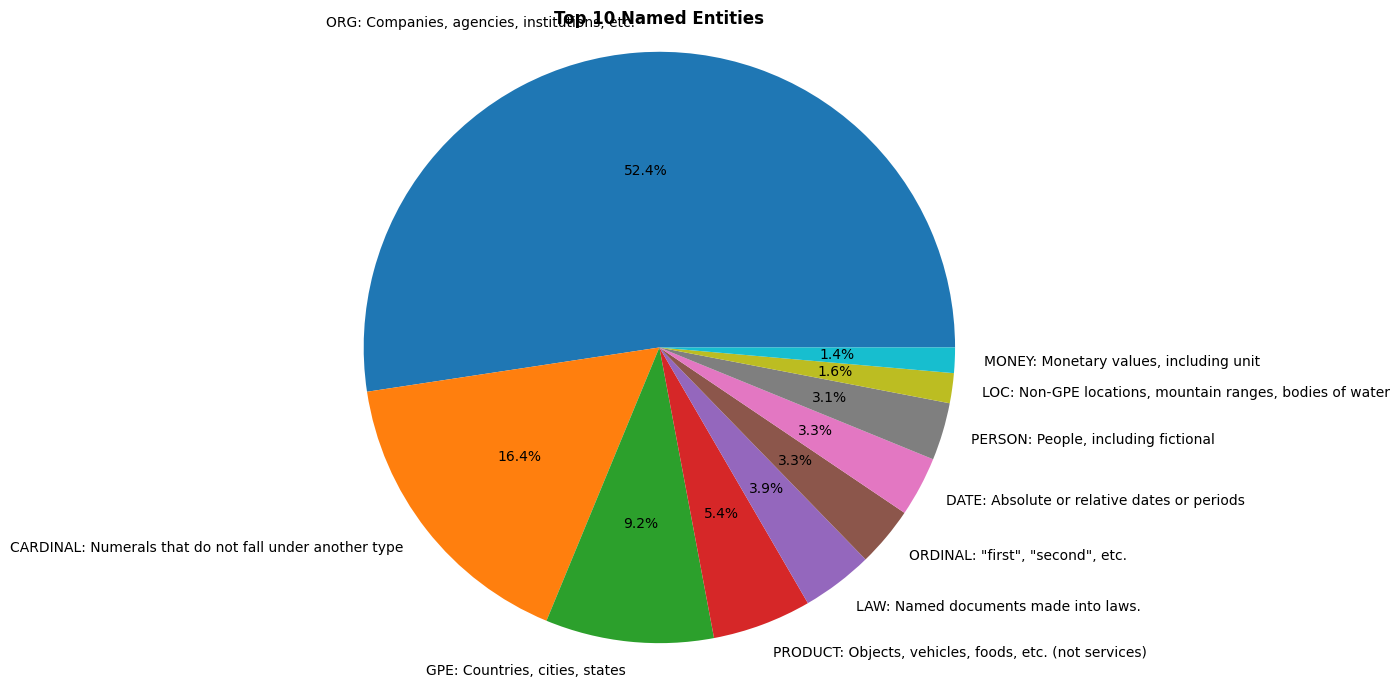

In [16]:
labels = df['Named Entities'].tolist()[0:10]
definitions = df['Definition'].tolist()[0:10]
percentage = df['Percentage'].tolist()[0:10]

fig, ax = plt.subplots()
plt.title("Top 10 Named Entities", fontweight='bold' ,pad=100)
ax.pie(percentage, labels=definitions, autopct='%1.1f%%', radius=2)
plt.show()